In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import fileinput
import csv
from itertools import product
from tqdm import tqdm
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

# figures will be inside notebook
%matplotlib inline 


## Case study : Monthly variation

### Tweet sequence 

In [2]:
df2 = pd.read_csv('celebrity-mentioned.csv', parse_dates=['date'])


In [3]:
clist =  df2.celebrity.unique().copy()
celebno  = 79
clist[celebno]

'taylorswift13'

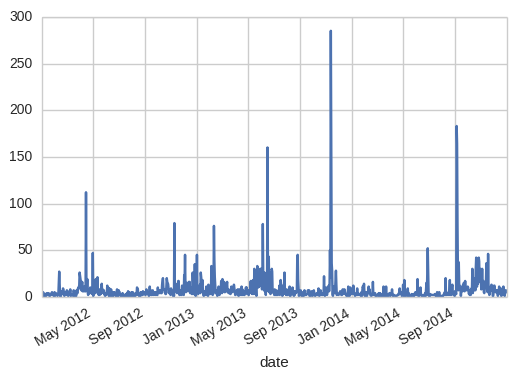

In [4]:
temp = df2.loc[df2['celebrity'] == clist[celebno]].copy()
temp.groupby('date').size().plot()

path = 'celebrity/' + str(clist[celebno])
if not os.path.exists(path):
    os.mkdir(path)
#plt.savefig(os.path.join(path,'Peakrem_daily_' + str(clist[celebno])+'.png'))



In [5]:
temp['date'] = pd.to_datetime(temp['date'])
temp['year'], temp['month'] = temp['date'].apply(lambda x: x.year), temp['date'].apply(lambda x: x.month)
temp['quarter'] = temp['date'].apply(lambda x: x.quarter)
year2012 = temp[temp['year'] == 2012].copy()
year2013 = temp[temp['year'] == 2013].copy()
year2014 = temp[temp['year'] == 2014].copy()
year2012 = year2012.groupby(['year', 'month']).size()
year2013 = year2013.groupby(['year', 'month']).size()
year2014 = year2014.groupby(['year', 'month']).size()

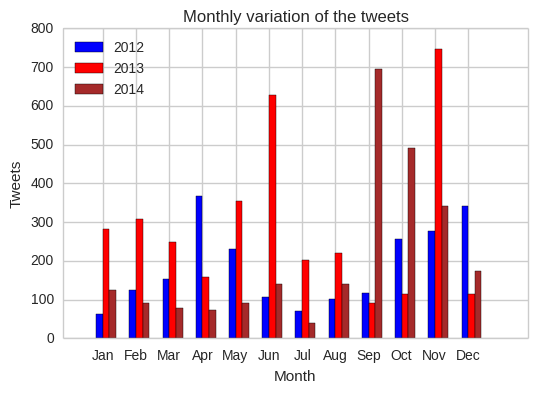

In [6]:
ind = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
width = 0.2
ax = plt.subplot(111)
a = ax.bar(ind,year2012.values.tolist(),width,color = 'blue')
b = ax.bar(ind+width,year2013.values.tolist(),width, color = 'red')
c = ax.bar(ind+width+width,year2014.values.tolist(),width,color = 'brown')


ax.set_xlabel('Month')
ax.set_ylabel('Tweets')

ax.set_xticks(ind + width)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax.set_title('Monthly variation of the tweets')

ax.legend((a[0], b[0], c[0]), ('2012', '2013','2014'),loc = 0)
plt.savefig(os.path.join(path,'Monthly_variation_' + str(clist[celebno])+'.png'))

## Case study : Monthly variation with peaky days removed

In [7]:
temp = 0
alltweets = df2.loc[df2['celebrity'] == clist[celebno]].copy()
cutoff = 50
temp2 = alltweets.groupby('date').size().copy()
temp_ind = temp2[temp2 < cutoff].index.get_level_values('date')
temp = alltweets[alltweets['date'].isin(temp_ind)].copy()


In [8]:
temp['date'] = pd.to_datetime(temp['date'])
temp['year'], temp['month'] = temp['date'].apply(lambda x: x.year), temp['date'].apply(lambda x: x.month)
temp['quarter'] = temp['date'].apply(lambda x: x.quarter)
year2012 = temp[temp['year'] == 2012].copy()
year2013 = temp[temp['year'] == 2013].copy()
year2014 = temp[temp['year'] == 2014].copy()
year2012 = year2012.groupby(['year', 'month']).size()
year2013 = year2013.groupby(['year', 'month']).size()
year2014 = year2014.groupby(['year', 'month']).size()

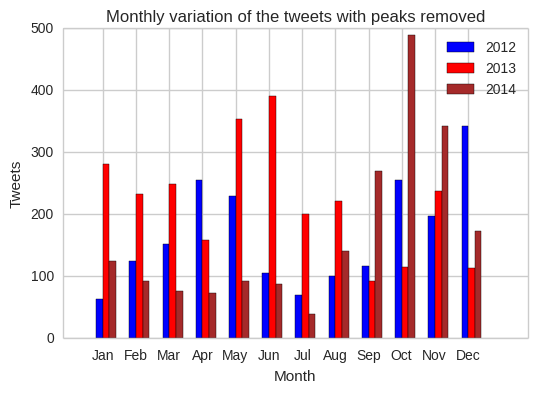

In [9]:
ind = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
width = 0.2
ax2 = plt.subplot(111)
ax2.bar(ind,year2012.values.tolist(),width,color = 'blue')
ax2.bar(ind+width,year2013.values.tolist(),width, color = 'red')
ax2.bar(ind+width+width,year2014.values.tolist(),width,color = 'brown')

ax2.set_xlabel('Month')
ax2.set_ylabel('Tweets')

ax2.set_xticks(ind + width)
ax2.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

ax2.set_title('Monthly variation of the tweets with peaks removed')

ax2.legend((a[0], b[0], c[0]), ('2012', '2013','2014'),loc = 0)
plt.savefig(os.path.join(path,'Monthly_variation_' + str(clist[celebno])+'.png'))

plt.savefig(os.path.join(path,'Monthly_variation_PeakRemoved_' + str(clist[celebno])+'.png'))